# E-handel: Snabbrapport

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Read CSV
df = pd.read_csv("../data/ecommerce_sales.csv")
# print(df.isna().sum())
print(double)



order_id    0
date        0
city        0
category    0
price       0
units       0
revenue     0
dtype: int64


Topp 3 kategorier efter intäkt:
category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Name: revenue, dtype: float64


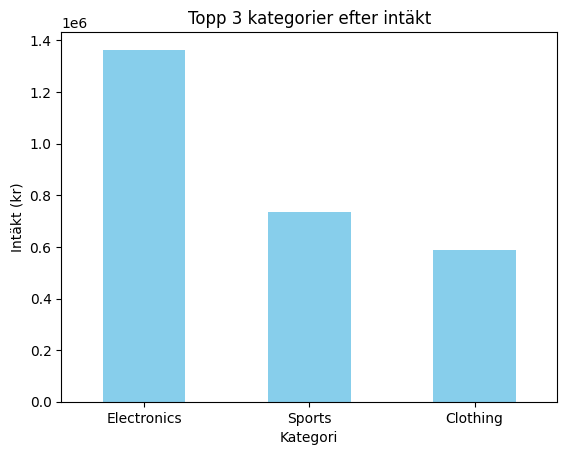

In [5]:
# Group by category and sum revenue
top3 = (
    df.groupby("category")["revenue"]
      .sum()
      .sort_values(ascending=False)
      .head(3)
)

# Display
print("Topp 3 kategorier efter intäkt:")
print(top3)

top3.plot(kind="bar", color="skyblue")
plt.title("Topp 3 kategorier efter intäkt")
plt.xlabel("Kategori")
plt.ylabel("Intäkt (kr)")
plt.xticks(rotation=0)
plt.show()
